In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
#Read the excel file and store the sheets into dataframes.
df = pd.ExcelFile(r"V02Max_Combined.xlsx")
kay = pd.read_excel(df, sheet_name = 'Kayaking')
ath = pd.read_excel(df, sheet_name = 'Athletes')
tri = pd.read_excel(df, sheet_name = 'Triathlon')
fen = pd.read_excel(df, sheet_name = 'Fencing')


## Qn1:Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [10]:
#Concatenating all sport related table to one dataframe final_table
final_table=pd.concat([fen[['ID','time','RR','VO2','power']],
                       kay[['ID','time','RR','VO2','power']],
                       tri[['ID','time','RR','VO2','power']]],ignore_index=True)

#defining output excel file name
output='FinalVO2_Table.xlsx'

#writing dataframe to excel using to_excel
final_table.to_excel(output,index=False)
print("Dataframe successfully written to Excel file",output)

#Reading the excel file back into dataframe for verification
print("\nReading",output,"Excel file for Verification:")
sportdf=pd.read_excel("FinalVO2_Table.xlsx")
print(sportdf)

Dataframe successfully written to Excel file FinalVO2_Table.xlsx

Reading FinalVO2_Table.xlsx Excel file for Verification:
       ID     time     RR       VO2  power
0       1 -130.840  672.0  0.302008      0
1       1 -130.168  672.0  0.302008      0
2       1 -129.536  632.0  0.301336      0
3       1 -128.824  712.0  0.301336      0
4       1 -127.948  876.0  0.301336      0
...    ..      ...    ...       ...    ...
52057  18  947.288  536.0  0.507071      0
52058  18  947.816  528.0  0.507071      0
52059  18  948.344  528.0  0.507071      0
52060  18  948.884  540.0  0.507071      0
52061  18  949.424  540.0  0.507071      0

[52062 rows x 5 columns]


## Qn2:Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [324]:
#Initialize Dataframe phase
phase=pd.DataFrame(final_table)

#initialize Phase column
phase['Phase']='Other Phase'

#Apply conditions to find Warm Up-time less than 0,GET-time>=0 and power>0,Cool Down-time>0 and power=0
phase.loc[phase['time']<0,'Phase']='Warm Up'
phase.loc[(phase['time']>=0) & (phase['power']>0),'Phase']='GET'
phase.loc[(phase['time']>0) & (phase['power']==0),'Phase']='Cool Down'

#print dataframe phase details
print(phase)

       ID     time     RR       VO2  power      Phase
0       1 -130.840  672.0  0.302008      0    Warm Up
1       1 -130.168  672.0  0.302008      0    Warm Up
2       1 -129.536  632.0  0.301336      0    Warm Up
3       1 -128.824  712.0  0.301336      0    Warm Up
4       1 -127.948  876.0  0.301336      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  18  947.288  536.0  0.507071      0  Cool Down
52058  18  947.816  528.0  0.507071      0  Cool Down
52059  18  948.344  528.0  0.507071      0  Cool Down
52060  18  948.884  540.0  0.507071      0  Cool Down
52061  18  949.424  540.0  0.507071      0  Cool Down

[52062 rows x 6 columns]


## Qn49:Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [325]:
#RR interval and inter-beat interval (IBI) are both measurements of time between heartbeats,IBI is essentially the same as the RR interval.

#Group by ID and sort RR values ascending,Then take the first value of RR using first()
a=fen.sort_values('RR').groupby('ID')['RR'].first().reset_index()

#Rename the RR column to IBI
a.rename(columns={'RR':'IBI'},inplace='True')

#Print ID and Minimun IBI value
print("Minimum IBI values for Fencing athletes:")
print(a)

Minimum IBI values for Fencing athletes:
   ID  IBI
0   1  304
1   2  304
2   3  328
3   4  268
4   5  316
5   6  296
6   7  252
7   8  300
8   9  300
9  10  312


## Qn50:Create a violin chart using any 2 columns in the dataset

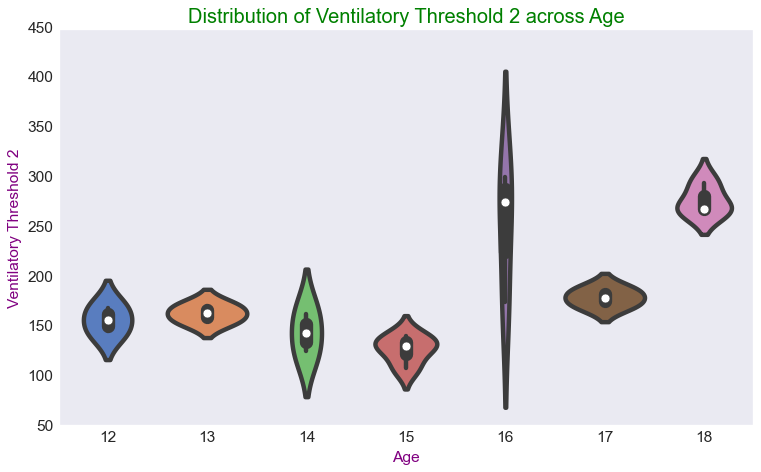

In [326]:
# Set the style of the plot
sns.set_style("dark" ,{"grid.color": ".6", "grid.linestyle": ":"})

# Defining plot area
plt.figure(figsize=(10, 6)) 

# Assigning x axis with age and y axis with ventilatory threshold 2
# Sort the athletes data by age in ascending order
sns.violinplot(x=ath.sort_values(by='age')['age'], y=ath['P_vt2'],palette="muted")

# Assigning title and labels
plt.title('Distribution of Ventilatory Threshold 2 across Age', fontsize=18, color ='green')
plt.xlabel('Age', fontsize=14, color='purple');
plt.ylabel('Ventilatory Threshold 2', fontsize=14, color='purple');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);



## Qn51:List every athlete’s V02 ml/kg

In [25]:
#Load athlete details into dataframe
VO2ml=pd.DataFrame(ath)

#Sum the VO2 values for each ID
Sum_VO2 = final_table.groupby('ID')['VO2'].sum().reset_index() 

#Merge sum of VO2 values for each id to VO2ml dataframe
VO2ml=VO2ml.merge(Sum_VO2,on='ID')

#Find VO2ml/kg which is VO2ml/min divided by each athlete weight
VO2ml['VO2ml/kg']=VO2ml['VO2']/VO2ml['Weight']

#display every athlete's VO2ml/kg values
VO2ml[['ID','First Name','Last Name','VO2ml/kg']].style.hide(axis='index')

ID,First Name,Last Name,VO2ml/kg
1,Olivia,Martinez,42.807730
2,Ethan,Reynolds,38.632602
3,Jackson,Harper,69.705657
4,Liam,Sanchez,76.989878
5,Ava,Thompson,86.742579
6,Sophia,Rodriguez,71.679465
7,Grace,Simmons,38.403988
8,Aiden,Bennett,44.822092
9,Chloe,Price,49.697342
10,Lily,Jordan,55.122171


## Qn52:Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

In [328]:
#Analysis - A higher VO2 max score indicates greater performance capacity and better physical fitness, and is associated with a lower risk 
#for cardiovascular disease and increased longevity.

#Sort VO2ml/kg values to find the athlete with max VO2ml/kg
Fittest=VO2ml.sort_values('VO2ml/kg',ascending=False).reset_index(drop=True)
top=Fittest.iloc[0]

#Print fittest athlete details
print("Analysis-The fittest athlete would likely be the one with the highest VO2max.")
print("Fittest athlete details based on Max VO2ml/kg:")
print("ID:",top['ID'],"\nFirst Name:",top['First Name'],"\nLast Name:",top['Last Name'],"\nVO2ml/kg:",top['VO2ml/kg'])


Analysis-The fittest athlete would likely be the one with the highest VO2max.
Fittest athlete details based on Max VO2ml/kg:
ID: 12 
First Name: Caleb 
Last Name: Dixon 
VO2ml/kg: 92.25821153298837


## Qn53:phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

In [329]:
#create phonebook dictionary with names and numbers
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781} 

#retrive jill's phone number using get()
a=phonebook.get("Jill")

#print jills's phone number
print("Jill phone number:",a)

Jill phone number: 947662781


## Qn54:Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID


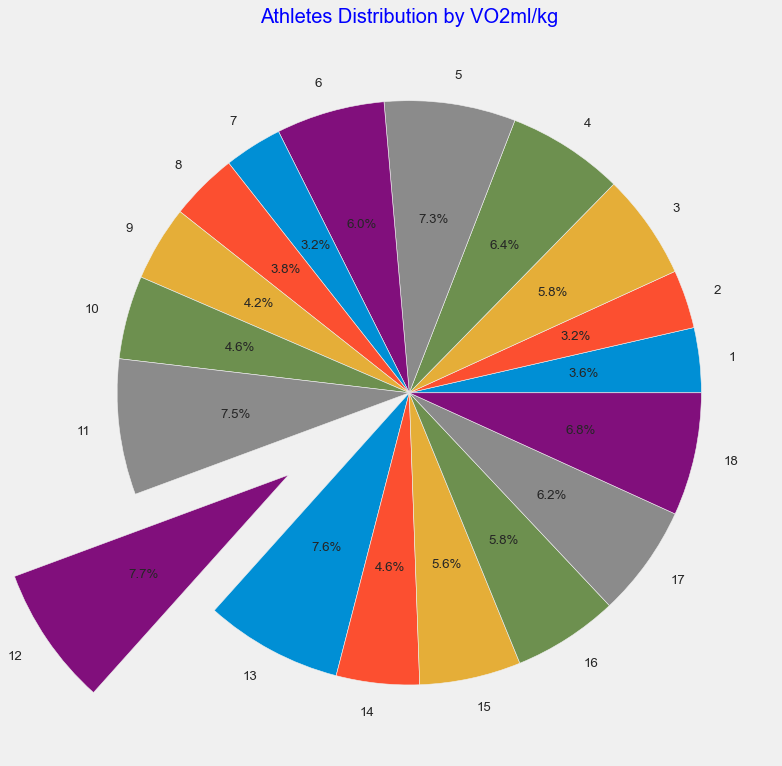

In [330]:
#Set the style of the plot
plt.style.use('fivethirtyeight')

# Defining plot area
plt.figure(figsize=(11,11))
plt.tight_layout()

#Assign x and y values
x=list(VO2ml['ID'])
y=list(VO2ml['VO2ml/kg'])
explodes=[0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0]

#plot pie chart
plt.pie(y,labels= x,explode=explodes,autopct="%1.1f%%", textprops={'fontsize':12})
plt.title('Athletes Distribution by VO2ml/kg', fontsize=18, color ='blue');

## Qn55:Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate


In [331]:
#Load triathlon and athlete details into dataframe
df2=pd.DataFrame(tri)
df1=pd.DataFrame(ath)

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
df2['HR']=60/(df2['RR']/1000)
High_HR=0

#Used for loop to iterate through rows to find the highest HR
for i,r in df2.iterrows():
 if r['HR']>High_HR:
    High_HR=r['HR']
    a=r['ID']
     
#Print athlete ID with highest HR
print("Athlete ID:",int(a),"has the highest heart rate:",High_HR)

#Used .loc to get the details of athelte with highest HR from athletes,triathlon dataframe
details1=df1.loc[df1['ID']==a]
details2=df2.loc[df2['HR']==High_HR]

#Merged details from both dataframe using merge
details=details1.merge(details2,on='ID')

#print athlete details
print("Athlete details:")
details

Athlete ID: 18 has the highest heart rate: 197.3684210526316
Athlete details:


,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,time,RR,VO2,power,HR
0,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,628.644,304.0,1.909147,170,197.368421


## Qn56:Display a histogram to show distribution of athletes by sport.

Count of Athletes By Sport:
        sport  count
0    fencing     10
1      kayak      6
2  triathlon      2


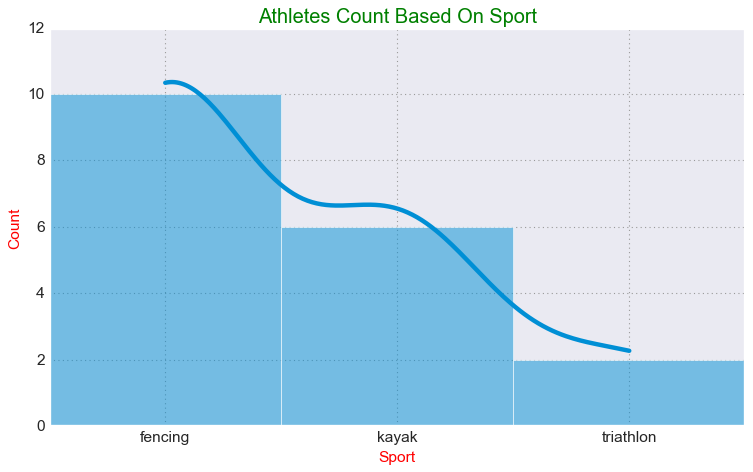

In [332]:
#Count of Athletes By Sport
print("Count of Athletes By Sport:\n",ath['sport'].value_counts().reset_index())

# Set the style of the plot
sns.set_style("darkgrid" ,{"grid.color": ".6", "grid.linestyle": ":"})

# Defining plot area
plt.figure(figsize=(10, 6)) 

# Assigning x axis with sport 
sns.histplot(x='sport',data=ath,kde=True)

# Assigning title and labels
plt.title('Athletes Count Based On Sport', fontsize=18, color ='green')
plt.xlabel('Sport', fontsize=14, color='red');
plt.ylabel('Count', fontsize=14, color='red');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.show()

## Qn57:get the first letter of last name of students using for loops and RegEX

In [333]:
#Used for loop to iterate through athletes table rows 
for i,r in ath.iterrows():
    lastname=r['Last Name']
    
#used Regex findall function to find the first letter of last name
    FirstLetter=re.findall(r'\b\w',lastname)
    
#print first letter of last name
    print("Last Name:",lastname,", First Letter:",FirstLetter[0])

Last Name: Martinez , First Letter: M
Last Name: Reynolds , First Letter: R
Last Name: Harper , First Letter: H
Last Name: Sanchez , First Letter: S
Last Name: Thompson , First Letter: T
Last Name: Rodriguez , First Letter: R
Last Name: Simmons , First Letter: S
Last Name: Bennett , First Letter: B
Last Name: Price , First Letter: P
Last Name: Jordan , First Letter: J
Last Name: Griffin , First Letter: G
Last Name: Dixon , First Letter: D
Last Name: Carpenter , First Letter: C
Last Name: Mitchell , First Letter: M
Last Name: Wallace , First Letter: W
Last Name: Anderson , First Letter: A
Last Name: Foster , First Letter: F
Last Name: Myers , First Letter: M


## Qn58:What is the average % difference in heart rate between warm up and GET for all athletes?

In [334]:
#Initialize Dataframe phase1
phase1=pd.DataFrame(phase)

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
phase1['HR']=60/(phase1['RR']/1000)

#Calculate mean Warmup & GET HR grouped by ID
Warmup_hr = phase1[phase1['Phase'] == 'Warm Up'].groupby('ID')['HR'].mean().reset_index(name='Warmup_HR')
GET_hr = phase1[phase1['Phase'] == 'GET'].groupby('ID')['HR'].mean().reset_index(name='GET_HR')

#merge warmup & GET HR based on id to HR_Both
HR_Both=pd.merge(Warmup_hr,GET_hr,on='ID')

#Calculate % difference in HR between warmup and GET
HR_Both['%Diff']=((HR_Both['GET_HR']- HR_Both['Warmup_HR'])/HR_Both['Warmup_HR'])*100

#Calculate the average % difference in Heart Rate between Warm up and GET
Average=HR_Both['%Diff'].mean()

#print the average % difference in Heart Rate between Warm up and GET
print(f"Average % difference in Heart Rate between Warm up and GET : {Average:.2f}")

Average % difference in Heart Rate between Warm up and GET : 91.66


## Qn59:Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [335]:
#Sort Height values to find the athlete with highest height
Tallest=VO2ml.sort_values('Height',ascending=False).reset_index(drop=True)
Tall=Tallest.iloc[0]

#Print Tallest athlete details
print("Tallest athlete details:")
print("ID:",Tall['ID'],"\nFirst Name:",Tall['First Name'],"\nLast Name:",Tall['Last Name'],"\nSport:",Tall['sport'],"\nVO2ml/kg:",Tall['VO2ml/kg'])

Tallest athlete details:
ID: 3 
First Name: Jackson 
Last Name: Harper 
Sport: fencing 
VO2ml/kg: 69.7056566894772


## Qn60:get the last letter of athletes last names using RegEX


In [336]:
#Used for loop to iterate through athletes table rows 
for i,r in ath.iterrows():
    lastname=r['Last Name']
    
#used Regex findall function to find the last letter of last name
    LastLetter=re.findall(r'\w$',lastname)
    
#print last letter of last name
    print("Last Name:",lastname,", Last Letter:",LastLetter[0])

Last Name: Martinez , Last Letter: z
Last Name: Reynolds , Last Letter: s
Last Name: Harper , Last Letter: r
Last Name: Sanchez , Last Letter: z
Last Name: Thompson , Last Letter: n
Last Name: Rodriguez , Last Letter: z
Last Name: Simmons , Last Letter: s
Last Name: Bennett , Last Letter: t
Last Name: Price , Last Letter: e
Last Name: Jordan , Last Letter: n
Last Name: Griffin , Last Letter: n
Last Name: Dixon , Last Letter: n
Last Name: Carpenter , Last Letter: r
Last Name: Mitchell , Last Letter: l
Last Name: Wallace , Last Letter: e
Last Name: Anderson , Last Letter: n
Last Name: Foster , Last Letter: r
Last Name: Myers , Last Letter: s


## Qn61:Reverse an arrays order in Python. You can use any array with any values you like.

In [337]:
#Creating a numpy array
x=np.array([11,22,32,41])

#Reverse array
Reversed=x[::-1]

#print reversed array
print("Reversed Array:",Reversed)

Reversed Array: [41 32 22 11]


## Qn62:What is the root mean of successive differences for 30 consecutive minutes for each athlete.

In [338]:
#Initialize dataframe
Dt=pd.DataFrame(final_table)
#create function
def rmsd(Dt):
    results = []
    for i, r in Dt.groupby('ID'):
        #sort the data
        r= r.sort_values('time')
        
        #calculate successive differences
        r['successive_diff'] = r['time'].diff()
        
        #drop NaN values 
        r= r.dropna()
        
        #calculate squared differences
        r['squared_diff'] = r['successive_diff'] ** 2
        
        #calculate mean of squared differences
        mean_squared_diff = r['squared_diff'].mean()
        
        #calculate RMSD in mins
        rmsd = np.sqrt(mean_squared_diff)/60
        
        #results
        results.append({'ID': i, 'RMSD': rmsd})
    
    return pd.DataFrame(results)

#calculating RMSD for each athlete
rmsd_cal = rmsd(Dt)
print(rmsd_cal)


    ID      RMSD
0    1  0.007140
1    2  0.008453
2    3  0.007917
3    4  0.007179
4    5  0.007623
5    6  0.009814
6    7  0.007579
7    8  0.010260
8    9  0.007143
9   10  0.007471
10  11  0.007626
11  12  0.007635
12  13  0.007498
13  14  0.007983
14  15  0.007733
15  16  0.012198
16  17  0.007952
17  18  0.007712


## Qn63:On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [342]:
#Load fencing and athlete details into dataframe
Zn=pd.DataFrame(fen)
Zn1=pd.DataFrame(ath)

#merge dateframes on ID to include age column 
det1=Zn.merge(Zn1[['ID','age','First Name','Last Name']],on='ID')

#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age
det1['time']=det1['time']/60
det1['HR']=60/(det1['RR']/1000)
det1['MaxHR']=220-det1['age']

#Define HR zone boundries for Zone 5 which is MaxHR=90-100%
zonemin=0.90*det1['MaxHR']
zonemax=1.00*det1['MaxHR']
det1['Zone']='Other Zones'
det1.loc[(det1['HR']>=zonemin)&(det1['HR']<=zonemax),'Zone']='Zone 5'
det1.loc[(det1['HR'].isnull()),'Zone']='NA'

#Calculate Average time for each athlete where Zone=Zone 5
Time=det1.loc[(det1['Zone']=='Zone 5')].groupby(['ID','First Name','Last Name'])['time'].mean().reset_index()
print("Time Spent By Each athlete from Fencing Sport in Zone 5:")

#Rename time column to Average Time
Time.columns=['ID','First Name','Last Name','Avg Time(Min) in Zone 5'] 

#Print Average Time
print(Time)

Time Spent By Each athlete from Fencing Sport in Zone 5:
   ID First Name  Last Name  Avg Time(Min) in Zone 5
0   1     Olivia   Martinez                 9.717880
1   2      Ethan   Reynolds                 8.292298
2   4       Liam    Sanchez                18.632690
3   5        Ava   Thompson                17.276875
4   6     Sophia  Rodriguez                14.780638
5   7      Grace    Simmons                 9.836957
6   8      Aiden    Bennett                10.216798
7   9      Chloe      Price                11.204425
8  10       Lily     Jordan                11.666611


## Qn64:Count athletes based on Gender using count plot

Count of Athletes By Gender:
    Gender  count
0  Female     10
1    Male      8


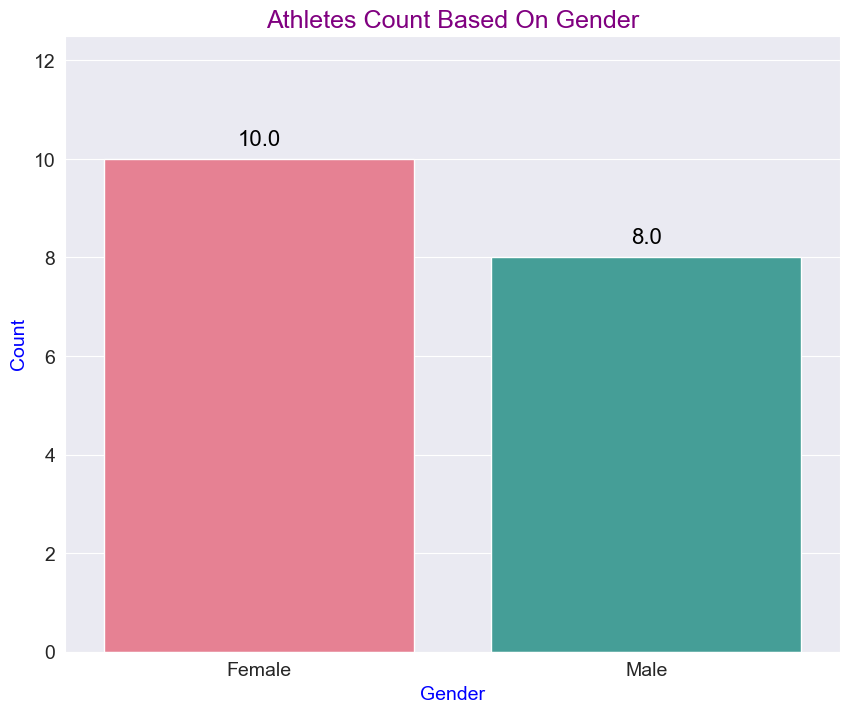

In [56]:
#Count of Gender
print("Count of Athletes By Gender:\n",ath['Gender'].value_counts().reset_index())

# Set the style of the plot
sns.set_style("darkgrid")

# Defining plot area
plt.figure(figsize=(10, 8)) 

# Assigning x axis with gender 
ax=sns.countplot(x='Gender',data=ath,palette='husl')

#To show count 
for p in ax.patches: 
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                va='baseline', fontsize=16, color='black', xytext=(0, 10), textcoords='offset points')
    ax.set_ylim(0, ax.get_ylim()[1] + 1)
    
# Assigning title and labels
plt.title('Athletes Count Based On Gender', fontsize=18, color ='Purple')
plt.xlabel('Gender', fontsize=14, color='blue');
plt.ylabel('Count', fontsize=14, color='blue');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.show()

       sport    Max VO2
0    fencing  57.460350
1      kayak  77.345233
2  triathlon  77.499291


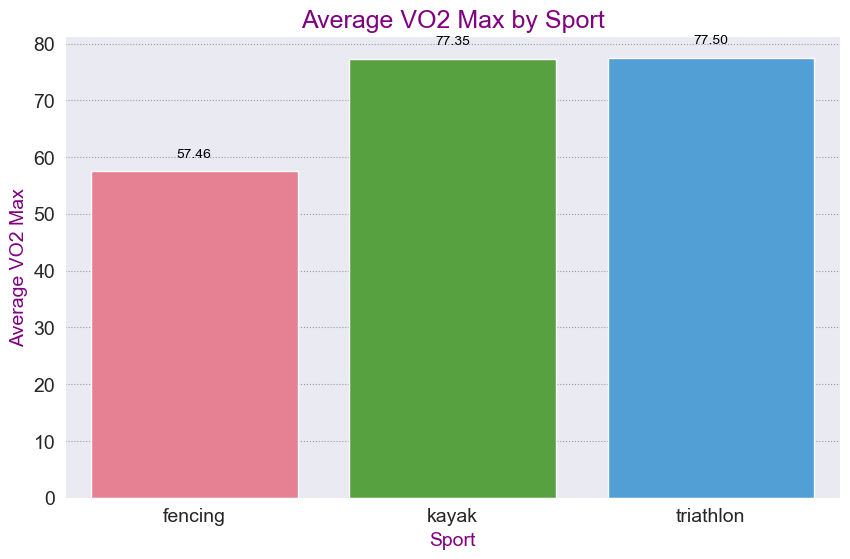

In [52]:
#Load athlete details into dataframe
maxVO2=pd.DataFrame(ath)

#Sum the VO2 values for each ID
total_VO2 = final_table.groupby('ID')['VO2'].sum().reset_index() 

#Merge sum of VO2 values for each id to maxVO2 dataframe
maxVO2=maxVO2.merge(total_VO2,on='ID')

#Find Max VO2 which is VO2 divided by each athlete weight
maxVO2['Max VO2']=maxVO2['VO2']/maxVO2['Weight']

#find the avg vo2 max group by sport
avg_maxvo2=maxVO2.groupby('sport')['Max VO2'].mean().reset_index()

#print VO2 max for each sport
print(avg_maxvo2)

# Set the style of the plot
sns.set_style("darkgrid" ,{"grid.color": ".6", "grid.linestyle": ":"})

#Plot bar chart
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='sport', y='Max VO2', data=avg_maxvo2, palette='husl')

#To show count 
for p in ax.patches:
 height = p.get_height()
 # Format height to 2 decimal points
 label = f'{height:.2f}'
 ax.annotate(label, (p.get_x() + p.get_width() / 2., height), ha='center',va='baseline', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

#Assign titles and lables
plt.title('Average VO2 Max by Sport',fontsize=18, color ='Purple')
plt.xlabel('Sport', fontsize=14, color ='Purple')
plt.ylabel('Average VO2 Max', fontsize=14, color ='Purple')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.show()

